##                                                    Approach To Analysis

The Center for World University Rankings (CWUR) publishes the only global university ranking that measures the quality of education and training of students as well as the prestige of the faculty members and the quality of their research without relying on surveys and university data submissions.


CWUR uses seven objective and robust indicators to rank the world's top 1000 universities:

 - Quality of Education, measured by the number of a university's alumni who have won major international awards, prizes, and medals relative to the university's size (15%)
 - Alumni Employment, measured by the number of a university's alumni who have held CEO positions at the world's top companies relative to the university's size (15%)
 - Quality of Faculty, measured by the number of academics who have won major international awards, prizes, and medals (15%)
 - Research Output, measured by the the total number of research papers (15%)
 - Quality Publications, measured by the number of research papers appearing in top-tier journals (15%)
 - Influence, measured by the number of research papers appearing in highly-influential journals (15%)
 - Citations, measured by the number of highly-cited research papers (10%) 

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.graph_objs as go
import plotly.plotly as py
import pandas_profiling
import warnings 
warnings.filterwarnings('ignore')

In [121]:
data = pd.read_csv("timesData.csv")
data.head(5)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42:58:00,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45:55:00,2011


## 1- Top 10 Countries having maximum Universities in the list for year 2012

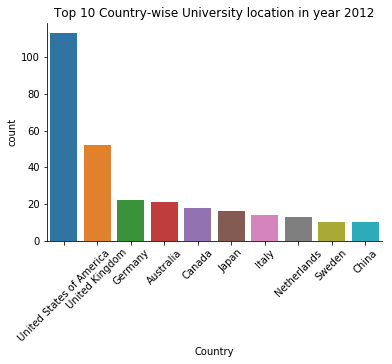

In [5]:

select_data1 = data.year == 2012
select_data = data[select_data1]
select_data = pd.DataFrame(select_data)
select_data = select_data.reset_index()
count = select_data['country'].value_counts()[:10]

# Convert the top 10 countries to a DataFrame 
df = count.to_frame()
# Reset the index 
df.reset_index(level=0, inplace=True)

# Rename the columns
df.columns = ['country', 'count']
df = df.sort_values(by = 'count', ascending = False)
# Plot a barplot with `country` and `count`
sns.barplot(x='country', y='count',data=df)
plt.title("Top 10 Country-wise University location in year 2012")
plt.xlabel('Country')
plt.xticks(rotation = 45)
sns.despine()

plt.show()

## ANALYSIS --
### a. USA has the maximum number of colleges to made it to the top 100 list near about 60.
### b. Then comes Uk, Japan, France.

## 2-Correlation between Teaching and Research

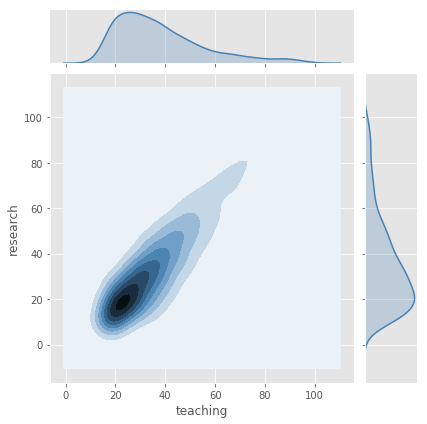

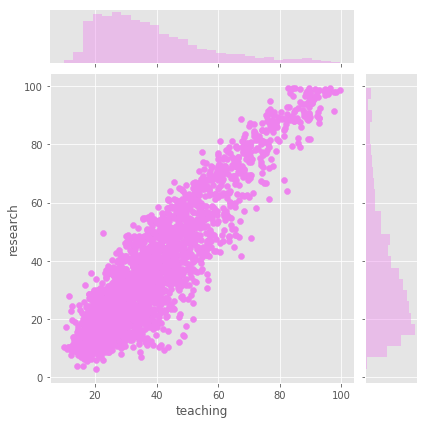

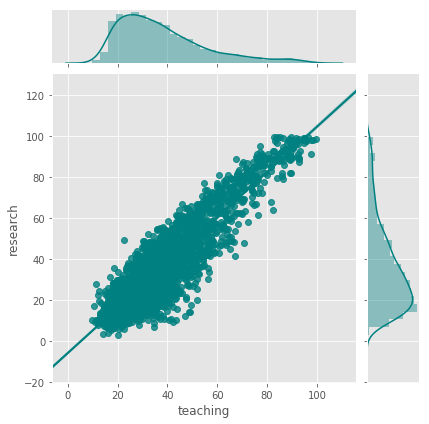

In [28]:

#plt.title("Joint Plot ", color = "magenta")
sns.jointplot(x = 'teaching', y = 'research', data = data, kind = 'kde',color='steelblue') ## Kernal Density Estimate  for PDF b/w variables

sns.jointplot(x = 'teaching', y = 'research', data = data, kind = 'scatter',color='violet')

sns.jointplot(x = 'teaching', y = 'research', data = data, kind = 'reg',color='teal') ## Regression to check long term inter-dependency

#plt.legend()
plt.style.use('ggplot')
## corr. b/w. teaching, total_score ; 
## num_students, year (growing or falling)

##  ANALYSIS
#### INFERENCES:  unimodel cases (bothTeaching and Research) + high Probability Density for lower scores
#### Teaching and Research  are correlated more for lower-scores; as they increase the scores become sparse and variable to each other
#### a Simple Regression Line b/w Teaching and Research positive growth trend in correlation => going to influence each other in the longer run

## 3-Teaching col.value analysis

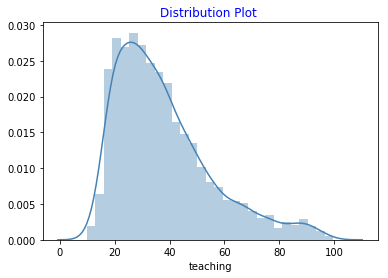

In [26]:
plt.title("Distribution Plot ", color = "Blue")
sns.distplot(data['teaching'], kde=True, color = 'steelblue')

##  ANALYSIS
### unimodal, positively skewed graph => teaching a maximum no. of scores b/w 20-40 and the higher scores are less in frequency 

## 4- Correlation study of different col.

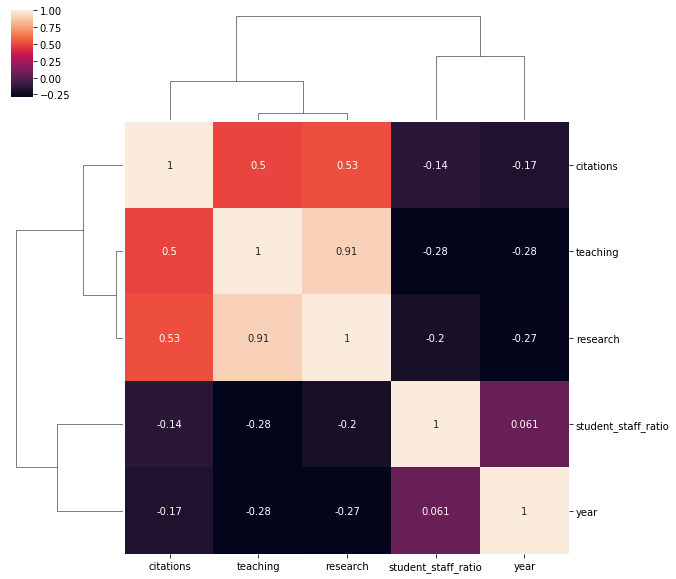

In [10]:

sns.clustermap(data.corr(), annot=True)
plt.show()

## Analysis
### It shows score is the part of largest cluster which depends on other smaller clusters that is dependent on other fields

## 5- Scatterplot of score to year

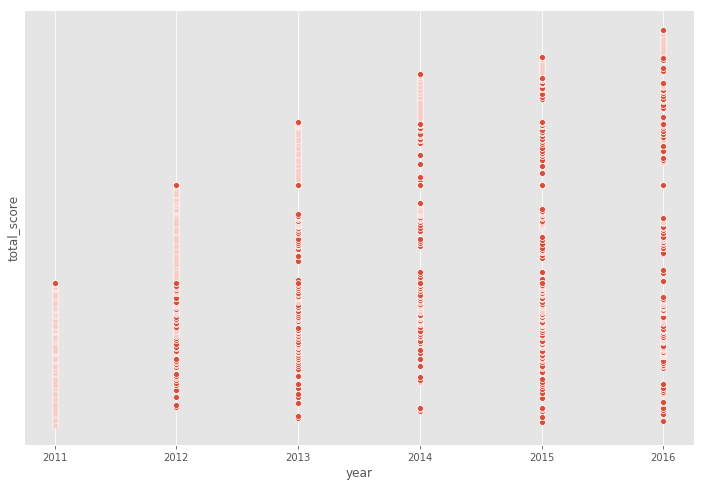

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [152]:
sns.scatterplot(x = 'year', y = 'total_score', data = data)
plt.yticks([])
plt.show()
plt.figure(figsize=(12,8))

## Analysis 
    a. In year 2012 most Universities had score less than 70.
    b. In year 2013 there were more Universities having score 75 to 95. Clear sign of improvement
    c. In year 2104, 2015 more and more colleges improved their score and came above 95.
    d. No. of countries added in USA are twice in year 2012

In [54]:
data['total_score'] = data['total_score'].apply(pd.to_numeric, errors='coerce')

## 6- Average score of Universities country-wise in year 2014.

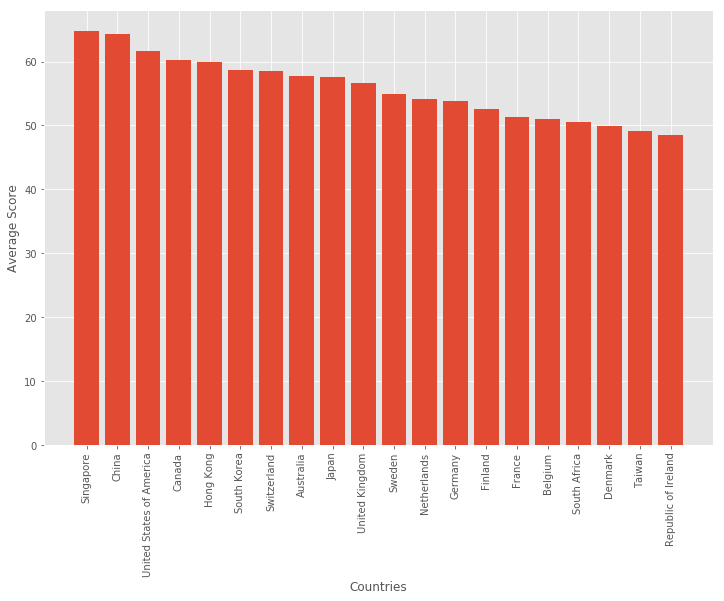

In [57]:
plt.figure(figsize=(12,8))
data[['year', 'country', 'total_score']]

q14 = data[['year', 'country', 'total_score']][data.year == 2014].groupby(['country']).mean().sort_values(by='total_score', ascending=False).head(20)
q14 = pd.DataFrame(q14)
q14 = q14.reset_index()
plt.bar(q14['country'], q14['total_score'])
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Average Score')
plt.show()

## Analysis
### Beating USA and UK universities countries like Israel, Switzerland and Singapore have made it to the Top 3. 
### Although the average score for all countries got decreased.

## 7-Country wise no. of students in universities

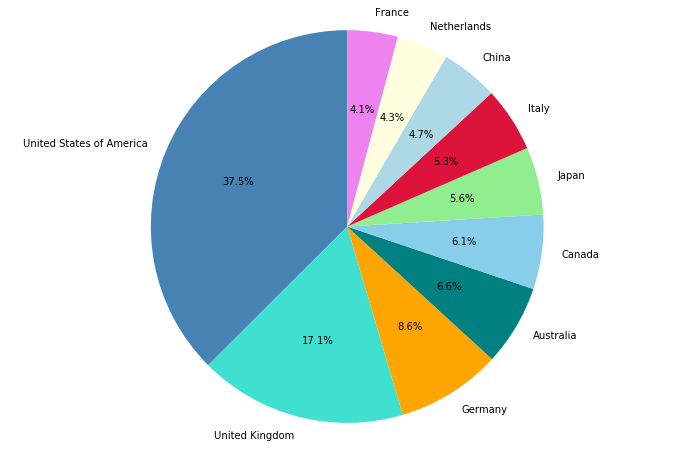

In [122]:
# Taking Top10 countries grouped by "total mentions"

t_cn = data.groupby(['country'])['num_students'].size()
t_cn = pd.DataFrame(t_cn)
t_cn = t_cn.reset_index()
#print(t_cn)

t_cn10 = t_cn.sort_values(by='num_students', ascending=False)
#t_cn10 = t_cn10.reset_index()
#t_cn10 = t_cn10.rename(columns={0:'Count'})
t_cn10.head(10)


colo = ["steelblue", "turquoise", "orange","teal", "skyblue", "lightgreen", "crimson", "lightblue", "lightyellow", "violet" ]
plt.figure(figsize = (12,8))
t_cn10 = t_cn10.head(10)

plt.pie(t_cn10['num_students'], labels= t_cn10['country'], 
        autopct= '%0.1f%%', startangle=90, colors = colo)
plt.axis('equal')
plt.show()

## Analysis
### US contain 37.5% students of total university
### thats why there research and training is also improvising

In [123]:
university_harvard = data[data['university_name']=='Harvard University']

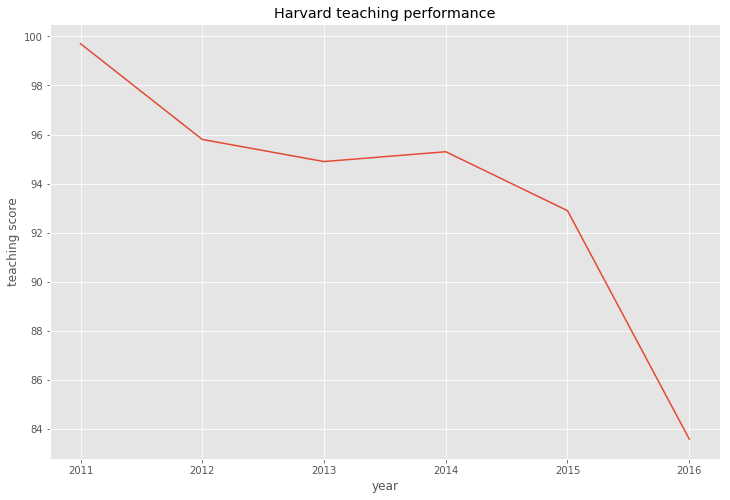

In [124]:
fig = plt.figure(figsize=(12,8))
plt.plot(university_harvard['year'],university_harvard['teaching'])
plt.xlabel('year')
plt.ylabel('teaching score')
plt.title('Harvard teaching performance')
plt.show()

## Analysis
### The teaching percentage in harvard university is decling every year and it has a negative trend

## ------------------------------------------------------------------------------------------------------------------------

## BANK DATASET

In [125]:
import matplotlib.pyplot as plt
from  pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,8]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [126]:
bank = pd.read_excel('bank-additional-full.xlsx')

In [127]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [128]:
bank_temp=bank.drop('y',axis=1)
bank_dummies=pd.get_dummies(bank_temp)
bank_dummies['y']=bank['y']
train,test =train_test_split(bank_dummies,test_size=0.3,random_state=200)
train_y =train['y']
test_y = test['y']
train_x=train.drop('y',axis=1)
test_x=test.drop('y',axis=1)

In [129]:
model = RandomForestClassifier(random_state=140)
model.fit(train_x,train_y)
test_pred = model.predict(test_x)
df_pred = pd.DataFrame({'actual':test_y,'predicted':test_pred})
df_pred['pred_status']=df_pred['actual'] ==df_pred['predicted']
rf_accuracy=df_pred[df_pred['pred_status']==True].shape[0] / df_pred.shape[0] *100
rf_accuracy

91.10625556364813

## 1-Whether the job and marital status have effect on term deposit

In [130]:
bank_unemployed =bank[(bank['job']=='unemployed')& (bank['marital']=='married')]

In [131]:
bank_unemployed  = bank_unemployed.groupby('y').size().reset_index().rename(columns={0:'Count'})
bank_unemployed

,y,Count
0,no,548
1,yes,86


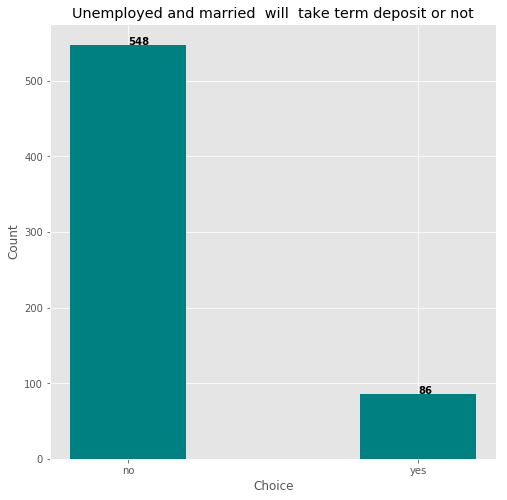

In [138]:
fig = plt.figure(figsize=(8,8))
plt.bar(bank_unemployed['y'],bank_unemployed['Count'],width=0.4,color='teal')
for i,v in enumerate(bank_unemployed['Count']):
    plt.text(i,v,str(v),color='black',fontweight='bold')
plt.xlabel('Choice')
plt.ylabel('Count')
plt.title('Unemployed and married  will  take term deposit or not')
plt.show()

## Analysis
### The persons who are unemployed and married have 80% chance that they will term deposits

## 2- Correlation between all numerical variables

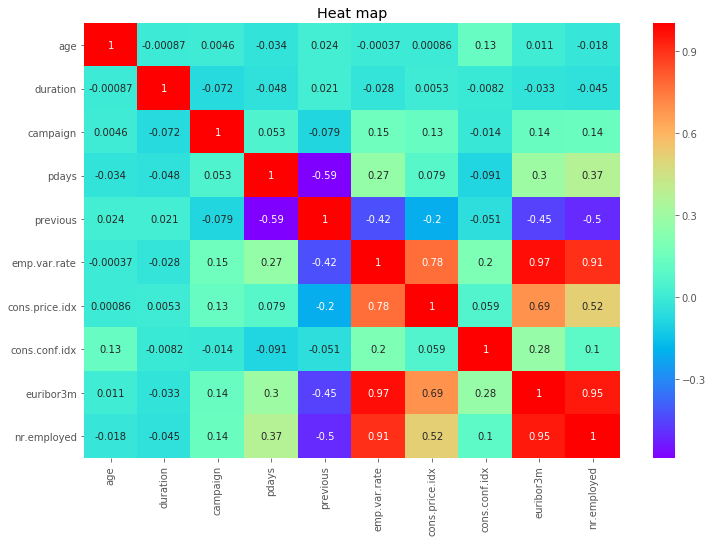

In [141]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(bank.corr(),cmap='rainbow',annot=True)
plt.title('Heat map')
plt.show()

## Analysis
### emp variation rate and euribor 3 month rate are highly correlated
### euribor rate and number of employees are also highly correlated

## 3-Boxplot between term deposit and euribor rata

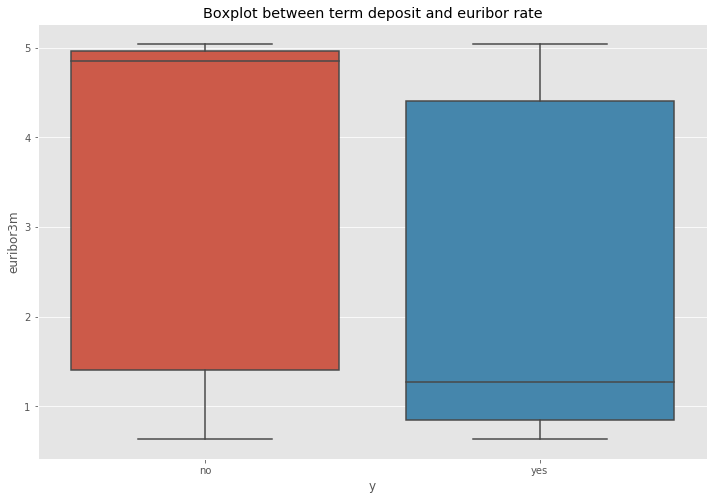

In [143]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='y',y='euribor3m',data=bank)
plt.title('Boxplot between term deposit and euribor rate')
plt.show()

## Analysis
### Those who take term deposit has IQR region in between 1 and 4
### Those who take term deposit has IQR region in between 2 and  5

## 4-Histogram for age,campaign,euribor3m,duration

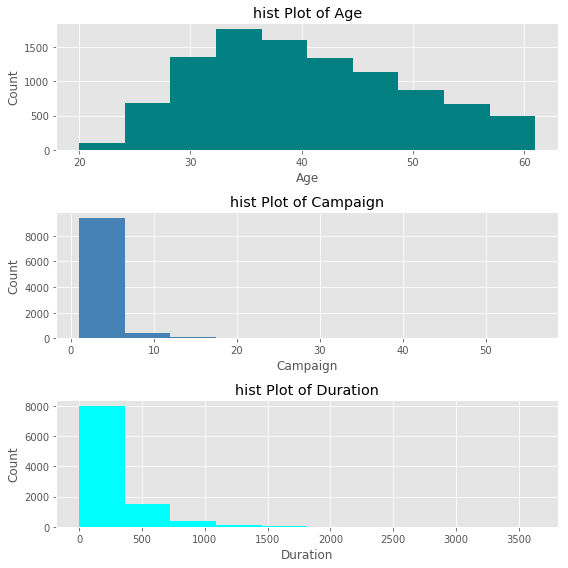

In [146]:
bank_1000 = bank.head(10000)
fig ,axes =plt.subplots(nrows = 3, ncols =1,figsize=(8,8))
axes[0].hist(bank_1000['age'],color='teal')
axes[1].hist(bank_1000['campaign'],color='steelblue')
axes[2].hist(bank_1000['duration'],color='cyan')
axes[0].set_title('hist Plot of Age')
axes[0].set_xlabel('Age')
axes[1].set_title('hist Plot of Campaign')
axes[1].set_xlabel('Campaign')
axes[2].set_title('hist Plot of Duration')
axes[2].set_xlabel('Duration')
axes[0].set_ylabel('Count')
axes[1].set_ylabel('Count')
axes[2].set_ylabel('Count')
plt.tight_layout()
plt.show()

## Analysis
### The distribution of age is normal
### The distribution of campaign is more concentrated in 1
### The distribution of distribution is more concentrated in 0 to 300

## 5- Parallel Coordinate Plot

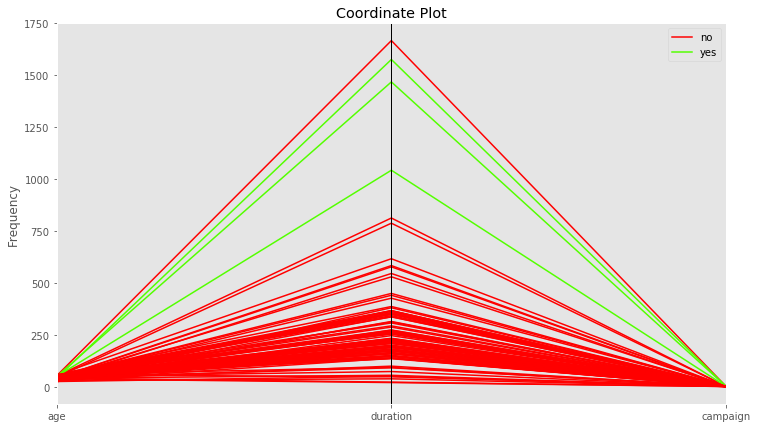

In [151]:
from  pandas.plotting import parallel_coordinates
fig = plt.figure(figsize=(12,7))
bank_parallel = bank[['age','duration','campaign','y']].head(100)
parallel_coordinates(bank_parallel,'y',colormap=plt.get_cmap('prism'))
plt.title('Coordinate Plot')
plt.ylabel('Frequency')
plt.show()

## Analysis
### The age for them who take term deposit lies between 25 to 30
### The duration is 1000 to 1600 who takes term deposit
### The campaign is more than one day who takes term deposit